In [1]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import matplotlib.pyplot as plt

from utils.preprocess import load_tof, Phi
from utils.plot import make_palette
from image_processing import process

from models.mixture import MixIRLS

In [2]:
def load_in_file(file_path):
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["x", "y"])
    return data

FILE_PATH = "../cut_eval/in_3/I127_36MeV_ref-TiN_pos02.asc"
df = load_in_file(FILE_PATH)
numpy_array = df.to_numpy()
numpy_array = np.unique(numpy_array, axis=0)
xraw = numpy_array[:,1]
yraw = numpy_array[:,0]
X, y = process(xraw, yraw, noise_sensitivity=0.9)
sort_idx = np.argsort(X)
X, y = X[sort_idx], y[sort_idx]

exponents = [-1/2, -1]
phi = Phi(X, exponents)

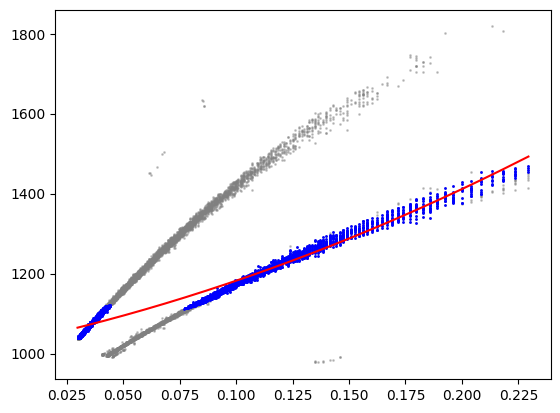

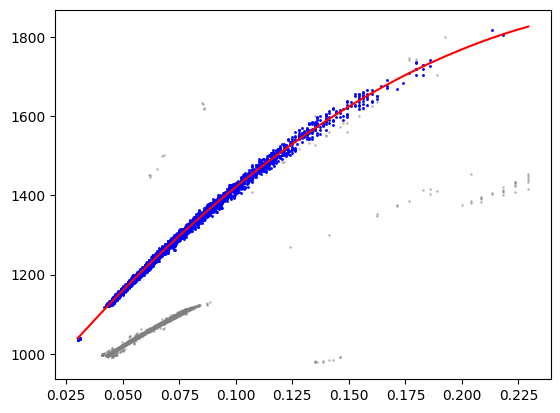

Parameters for 2 components:
 [[  1026.0182417     840.08237008]
 [  1199.10877133   6982.260175  ]
 [  3642.49355037 -11692.30071762]]


In [3]:
K = 2
w_th=0.95
plot = True

model = MixIRLS(K=K, w_th=w_th, plot=plot)

sprim, supports, iter = model.train(phi, y)
print(f"Parameters for {K} components:\n", model.beta)

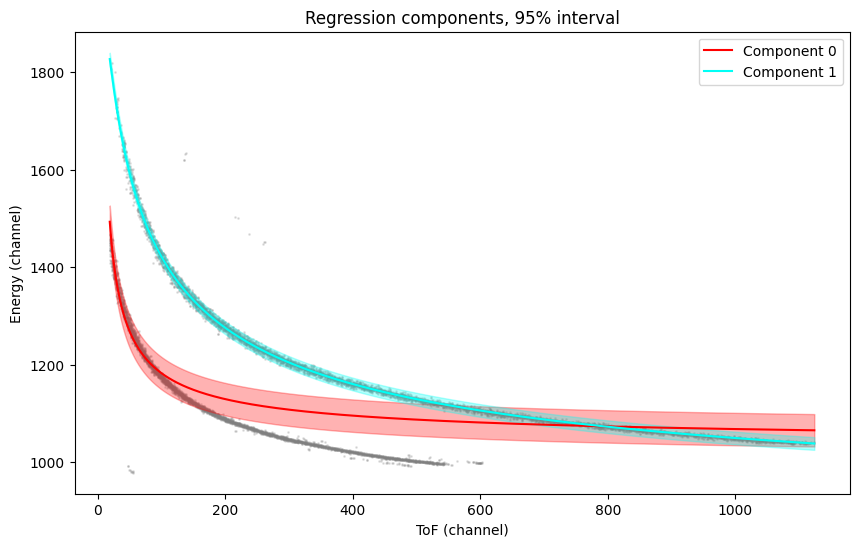

In [4]:
colors = make_palette(K, cmap=plt.cm.hsv)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.2, color='grey', s=1)
plt.xlabel('ToF (channel)')
plt.ylabel('Energy (channel)')
plt.title('Regression components, 95% interval')

# Predict all components at once
y_pred = model.predict(phi)
for k in range(K):
    plt.plot(X, y_pred[:,k], color=colors[k], label=f"Component {k}")
    plt.fill_between(X, y_pred[:,k] - 2*np.sqrt(model.sigma[k]), y_pred[:,k] + 2*np.sqrt(model.sigma[k]), color=colors[k], alpha=0.3)
    
plt.legend()
plt.show()

Points in support for component 0:  10071
  Number of points in component 0:  3928

Points in support for component 1:  6143
  Number of points in component 1:  4155



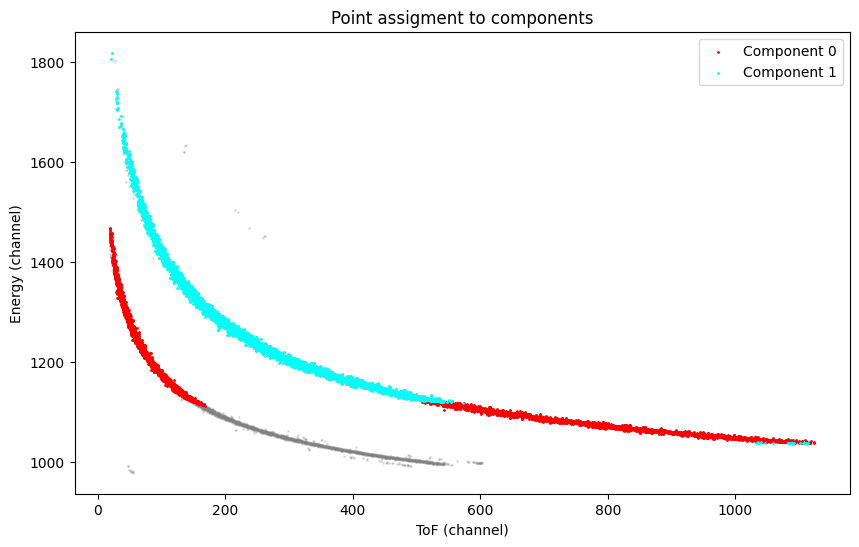

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.2, s=1, color='grey')
plt.xlabel('ToF (channel)')
plt.ylabel('Energy (channel)')
plt.title('Point assigment to components')
for k in range(K):
    
    i, j = model.get_component_indeces(k)
    E, ToF = model.get_component_points(X, y, k)

    print(f"Points in support for component {k}: ", i.sum())
    print(f"  Number of points in component {k}: ", len(X[i][j]), end='\n\n')
    
    plt.scatter(E, ToF, alpha=1, s=1, marker='o',  color=colors[k], label=f"Component {k}")

plt.legend()
plt.show()

In [6]:
tmp = model.assign_cluster(phi, y)
print(tmp)

[-1  0 -1 ...  0  0  0]
